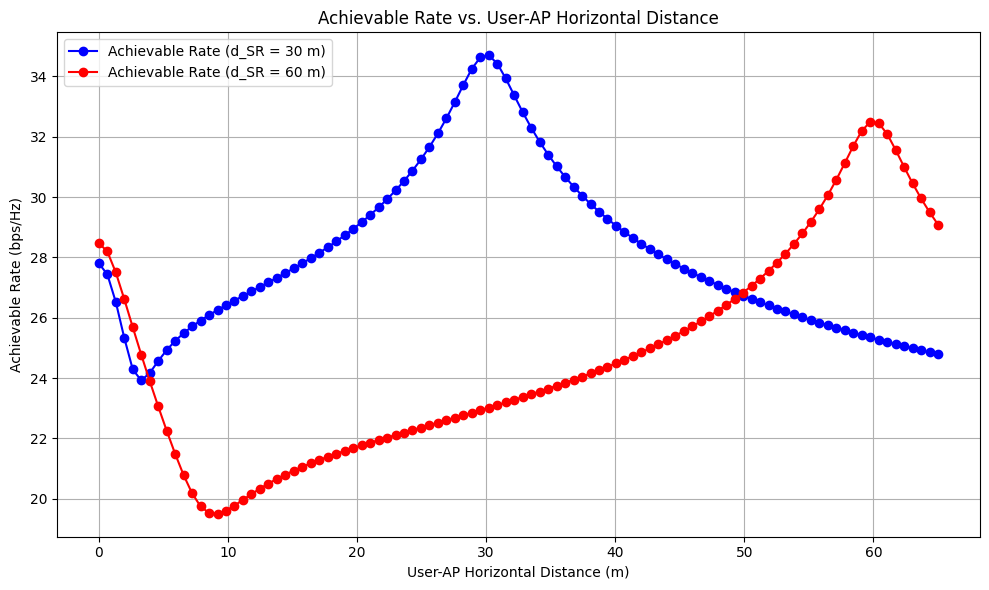

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
Pt = 1

# Compute the noise power in dBm
sigma2dBm = -80
sigma2 = 10**(sigma2dBm/10)

# Gamma in dB
GammadB = 9
Gamma = 10**(GammadB/10)

# Carrier frequency (in GHz)
fc = 3

# Minimum distance between receiver and IRS
dv = 2

# Define two different distances between the transmitter and IRS
d_SR1 = 30  # First distance
d_SR2 = 60  # Second distance

# Coordinates of AP and IRS
AP_Xcoordinate = 0
AP_Ycoordinate = 0
AP_Zcoordinate = 0

# Define the range of d1 values in the simulation setup
distances = np.linspace(0, 65, 100)

# Number of antennas at AP
N = 1

# Set the amplitude reflection coefficient
beta = 1

# Number of sub-surfaces
M = 12

# Design of phase vector of IRS
psi = np.linspace(1, 2*np.pi, M)
phi = beta * np.exp(1j*psi)
Phi = np.diag(phi)

# Path loss model
pathloss_3GPP_NLOS = lambda x, y: 10**((30 - 10*y*np.log10(x))/10)

# Small-scale fading channel
Gaussian_dist = np.sqrt(0.5) * (np.random.randn(1000 + M, 1) + 1j*np.random.randn(1000 + M, 1))
gSDLOS = np.reshape(Gaussian_dist[0:N, 0], (N, 1))
gSRLOS = np.reshape(Gaussian_dist[100:100+M*N, 0], (N, M))
gRDLOS = np.reshape(Gaussian_dist[1000:1000+M, 0], (1, M))

# Function to calculate achievable rate for a given d_SR
def calculate_achievable_rate(d_SR):
    C_phi = np.zeros((len(distances)))
    for d in range(0, len(distances)):
        d1 = distances[d]
        d_SD = np.sqrt(d1**2 + dv**2)
        d_RD = np.sqrt((d1 - d_SR)**2 + dv**2)

        # Compute the channel gains using the 3GPP models
        betaSR = pathloss_3GPP_NLOS(d_SR, 2.2)
        betaRD = pathloss_3GPP_NLOS(d_RD, 2.4)
        betaSD = pathloss_3GPP_NLOS(d_SD, 3.5)

        # Channel response in time domain
        gSR = np.sqrt(betaSR) * gSRLOS
        gRD = np.sqrt(betaRD) * gRDLOS
        gSD = np.sqrt(betaSD) * gSDLOS

        # Calculate W_n(phi) for each subcarrier
        W = np.power(np.abs(gSR @ Phi @ gRD.T + gSD), 2)

        # Calculate achievable rate
        rate = np.log2(1 + (Pt * W / (Gamma * sigma2)))
        C_phi[d] = rate[0, 0]
    return C_phi

# Calculate achievable rates for both d_SR1 and d_SR2
C_phi1 = calculate_achievable_rate(d_SR1)
C_phi2 = calculate_achievable_rate(d_SR2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(distances, C_phi1, 'bo-', label=f"Achievable Rate (d_SR = {d_SR1} m)", markersize=6)
plt.plot(distances, C_phi2, 'ro-', label=f"Achievable Rate (d_SR = {d_SR2} m)", markersize=6)
plt.xlabel("User-AP Horizontal Distance (m)")
plt.ylabel("Achievable Rate (bps/Hz)")
plt.title("Achievable Rate vs. User-AP Horizontal Distance")
plt.grid(True)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()